#**Installing and fetching the kaggle API**

In [1]:
!pip install kaggle

In [2]:
#Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:06<00:00, 33.7MB/s]
100% 163M/163M [00:06<00:00, 28.0MB/s]


In [4]:
#Extracting zip files
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


#**Importing Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

#**Loading the dataset**

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3457.jpg', 'with_mask_1870.jpg', 'with_mask_287.jpg', 'with_mask_1206.jpg', 'with_mask_2766.jpg']
['with_mask_32.jpg', 'with_mask_3222.jpg', 'with_mask_3644.jpg', 'with_mask_756.jpg', 'with_mask_1456.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_612.jpg', 'without_mask_114.jpg', 'without_mask_2585.jpg', 'without_mask_625.jpg', 'without_mask_1718.jpg']
['without_mask_2262.jpg', 'without_mask_3490.jpg', 'without_mask_2725.jpg', 'without_mask_151.jpg', 'without_mask_1051.jpg']


In [9]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


#**Creating labels for the two class of images**
- with mask --> 1
- without mask --> 0

In [10]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
len(labels)

7553

#**Displaying the images**

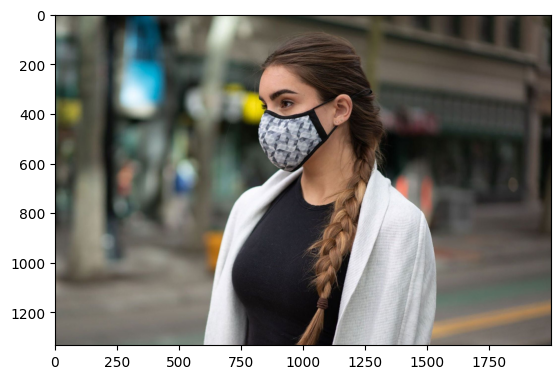

In [14]:
#Display with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3457.jpg')
imgplot = plt.imshow(img)
plt.show()

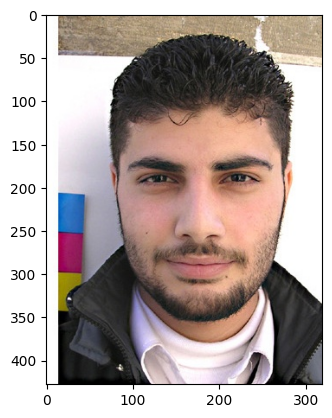

In [15]:
#Display without mask image
img  = mpimg.imread('/content/data/without_mask/without_mask_612.jpg')
imgplot = plt.imshow(img)
plt.show()


#**Image processing**
- Resize the images
- convert the images to numpy arrays

In [16]:
#converting images to numpy arrays
with_mask_path = "/content/data/with_mask/"
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/data/without_mask/"
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
len(data)

7553

In [18]:
type(data)

list

array([[[123, 125, 112],
        [134, 134, 122],
        [134, 134, 122],
        ...,
        [ 78,  71,  63],
        [ 59,  58,  46],
        [ 40,  41,  34]],

       [[129, 131, 118],
        [140, 141, 128],
        [137, 137, 124],
        ...,
        [ 71,  64,  54],
        [ 50,  48,  36],
        [ 37,  39,  27]],

       [[140, 142, 127],
        [147, 149, 134],
        [139, 140, 126],
        ...,
        [ 70,  63,  52],
        [ 43,  42,  29],
        [ 32,  34,  21]],

       ...,

       [[107, 105, 100],
        [110, 105, 101],
        [110, 106, 101],
        ...,
        [108, 100,  93],
        [105,  97,  90],
        [103,  94,  87]],

       [[103, 102,  97],
        [104, 103,  98],
        [105, 104,  99],
        ...,
        [101,  94,  86],
        [ 98,  89,  82],
        [ 93,  84,  78]],

       [[104, 103,  98],
        [105, 104,  99],
        [106, 105, 100],
        ...,
        [ 92,  85,  78],
        [ 86,  80,  74],
        [ 80,  76,  73]]], dtype=uint8)
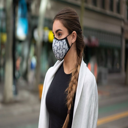

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#converting image list and labels list into numpy array
X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


#**Splitting the data into train test split**

In [26]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [27]:
#Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
X_test_scaled.shape

(6042, 128, 128, 3)

array([[[230, 230, 232],
        [230, 230, 232],
        [230, 230, 232],
        ...,
        [229, 227, 230],
        [229, 227, 230],
        [228, 226, 228]],

       [[231, 231, 233],
        [231, 231, 233],
        [231, 231, 233],
        ...,
        [230, 228, 231],
        [230, 228, 231],
        [229, 227, 229]],

       [[233, 233, 235],
        [233, 233, 235],
        [233, 233, 235],
        ...,
        [231, 229, 232],
        [231, 229, 232],
        [230, 228, 230]],

       ...,

       [[218, 219, 221],
        [217, 218, 220],
        [217, 218, 220],
        ...,
        [215, 213, 216],
        [217, 215, 219],
        [221, 219, 223]],

       [[217, 218, 220],
        [217, 218, 220],
        [216, 217, 219],
        ...,
        [212, 210, 213],
        [221, 219, 223],
        [217, 215, 219]],

       [[217, 219, 219],
        [216, 218, 218],
        [216, 218, 218],
        ...,
        [202, 200, 201],
        [221, 219, 221],
        [218, 216, 218]]], dtype=uint8)
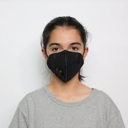

In [29]:
X_train[0]

In [30]:
X_train_scaled[0]

array([[[0.90196078, 0.90196078, 0.90980392],
        [0.90196078, 0.90196078, 0.90980392],
        [0.90196078, 0.90196078, 0.90980392],
        ...,
        [0.89803922, 0.89019608, 0.90196078],
        [0.89803922, 0.89019608, 0.90196078],
        [0.89411765, 0.88627451, 0.89411765]],

       [[0.90588235, 0.90588235, 0.91372549],
        [0.90588235, 0.90588235, 0.91372549],
        [0.90588235, 0.90588235, 0.91372549],
        ...,
        [0.90196078, 0.89411765, 0.90588235],
        [0.90196078, 0.89411765, 0.90588235],
        [0.89803922, 0.89019608, 0.89803922]],

       [[0.91372549, 0.91372549, 0.92156863],
        [0.91372549, 0.91372549, 0.92156863],
        [0.91372549, 0.91372549, 0.92156863],
        ...,
        [0.90588235, 0.89803922, 0.90980392],
        [0.90588235, 0.89803922, 0.90980392],
        [0.90196078, 0.89411765, 0.90196078]],

       ...,

       [[0.85490196, 0.85882353, 0.86666667],
        [0.85098039, 0.85490196, 0.8627451 ],
        [0.85098039, 0

#**Building a CNN**

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [32]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#Compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [34]:
# Training a neural network
history = model.fit(X_train_scaled, y_train, validation_split = 0.05, epochs = 5)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - acc: 0.6221 - loss: 0.9803 - val_acc: 0.8684 - val_loss: 0.3018
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - acc: 0.8891 - loss: 0.2878 - val_acc: 0.9079 - val_loss: 0.2669
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.8850 - loss: 0.2812 - val_acc: 0.8947 - val_loss: 0.2372
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9234 - loss: 0.2078 - val_acc: 0.9211 - val_loss: 0.2369
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9308 - loss: 0.1575 - val_acc: 0.8289 - val_loss: 0.3578


#**Model Evaluation**

In [35]:
loss, accuracy = model.evaluate(X_test_scaled,y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8805 - loss: 0.3060
Loss:  0.30103567242622375
Accuracy:  0.8793445825576782


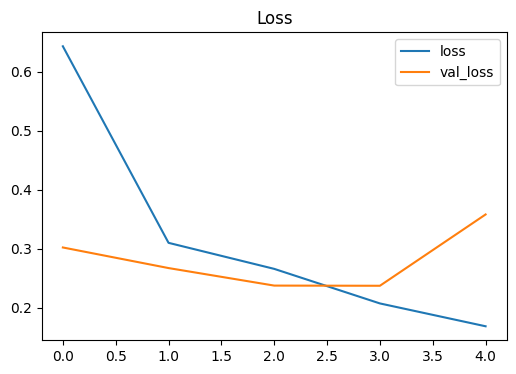

In [52]:
h=history
#Plot the loss value
plt.figure(figsize=(6, 4))
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.show()



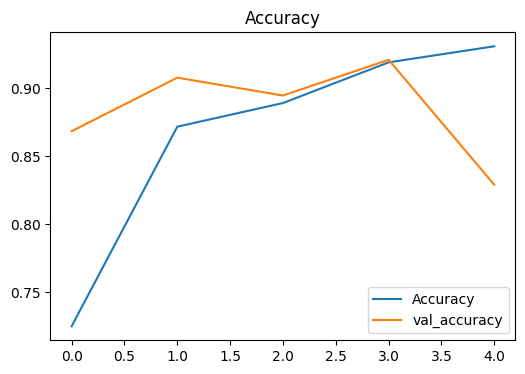

In [51]:
#Plot the accuracy value

plt.figure(figsize=(6, 4))
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend(['Accuracy','val_accuracy'])
plt.title('Accuracy')
plt.show()

#**Predictive system**

Enter path of the image to predict: /content/not wearing mask.jpeg


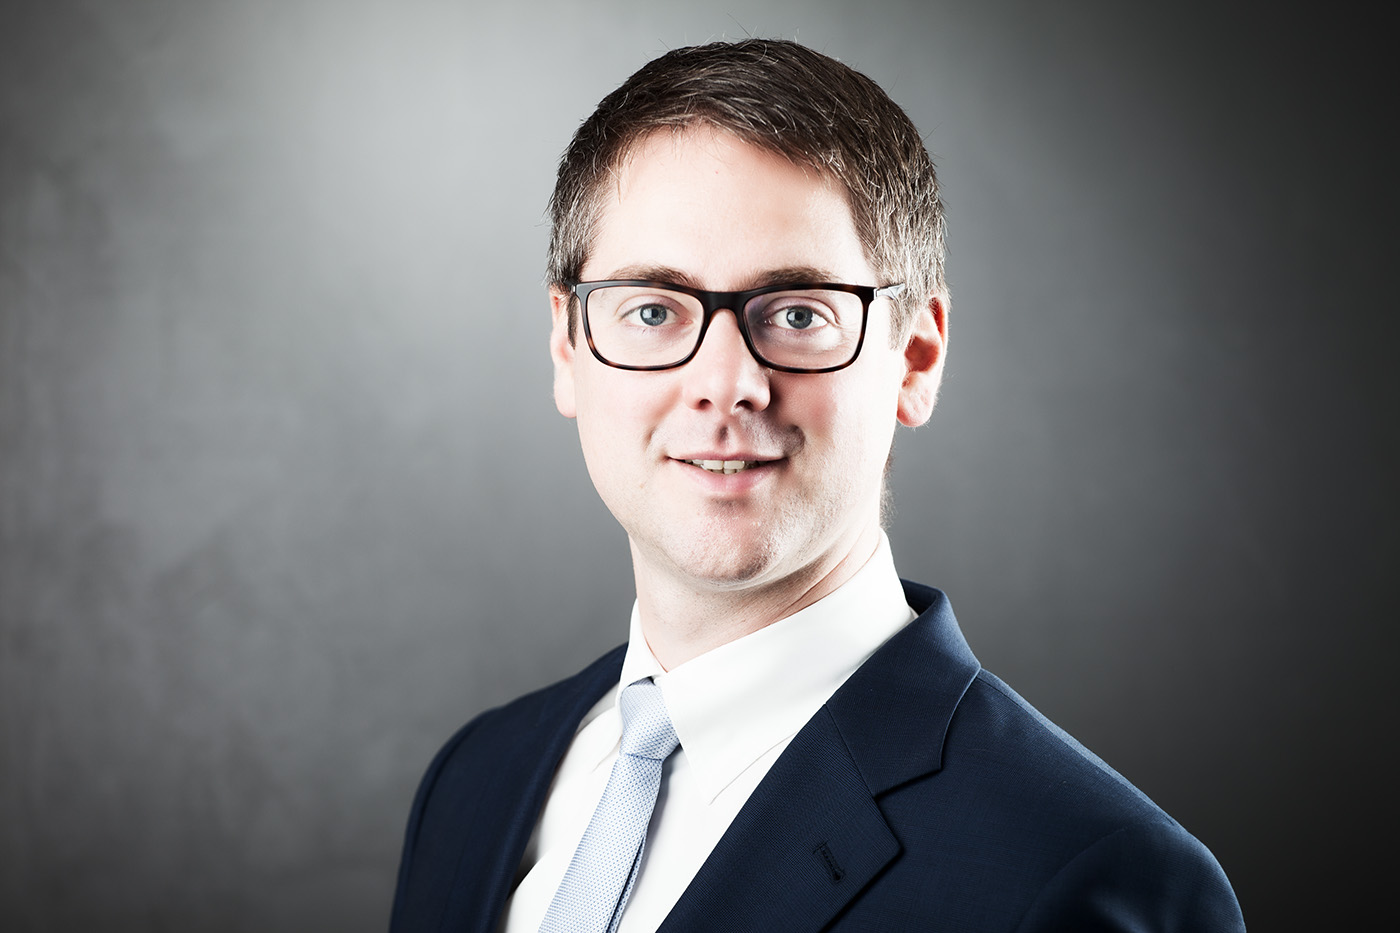

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.5103548  0.24735236]]
0
The person in the image is not wearing a mask


In [57]:
input_image_path=input('Enter path of the image to predict: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128, 128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label= np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")